In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,baa26895-85b2-465b-a972-649b41d9870e,0,4.903760,0.000024,1.847580,2.55923,48.79130,0.033327,41.864800,sad
1,baa26895-85b2-465b-a972-649b41d9870e,1,0.179621,0.000185,0.055258,93.56640,6.18999,0.001184,0.007402,happy
2,baa26895-85b2-465b-a972-649b41d9870e,2,10.126300,0.087004,6.057070,42.70380,19.81920,15.360900,5.845700,happy
3,baa26895-85b2-465b-a972-649b41d9870e,3,37.344900,0.427457,2.784040,16.53680,35.73190,0.534506,6.640390,angry
4,baa26895-85b2-465b-a972-649b41d9870e,4,0.003088,0.000003,0.002681,98.51810,1.47585,0.000055,0.000212,happy


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB


In [4]:
emotion_df.shape

(87, 10)

In [5]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8.700000e+01  87.000000  87.000000  87.000000   
mean   43.000000  10.395041  3.918153e-01   6.747536  35.063288  18.558391   
std    25.258662  22.483989  1.555114e+00  13.716758  40.139694  23.306587   
min     0.000000   0.000015  2.198970e-10   0.000002   0.011498   0.005248   
25%    21.500000   0.098704  2.648140e-06   0.159929   1.595905   1.525660   
50%    43.000000   0.965159  5.163640e-04   1.824250  11.561100   7.884060   
75%    64.500000   6.389125  8.824245e-02   4.961165  80.356200  29.037500   
max    86.000000  95.056300  1.270010e+01  82.107700  99.981800  97.396900   

           surprise    neutral  
count  8.700000e+01  87.000000  
mean   2.267330e+00  26.576600  
std    1.140703e+01  38.906958  
min    8.514920e-07   0.000104  
25%    5.336645e-03   0.122892  
50%    5.422400e-02   1.470510  
75%    2.809355e-01  58.685050  
max    9.976910e+01  99.854700  


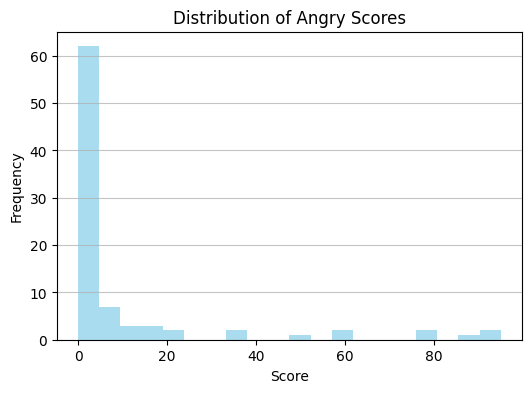

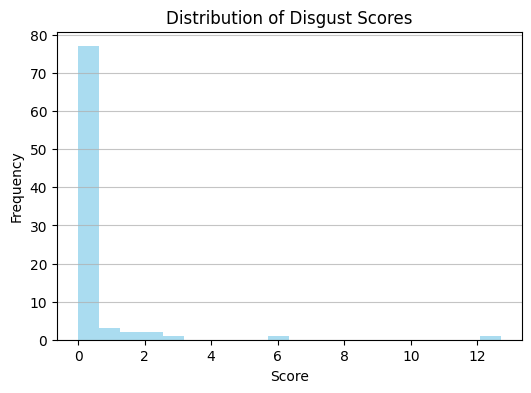

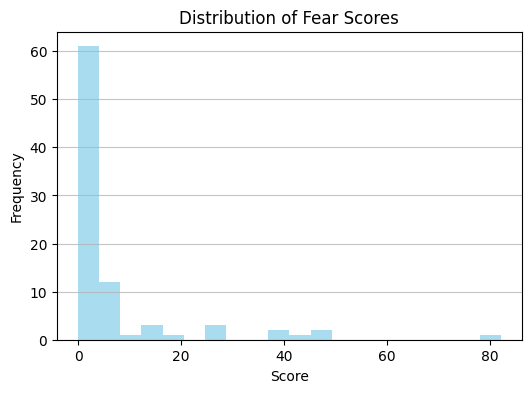

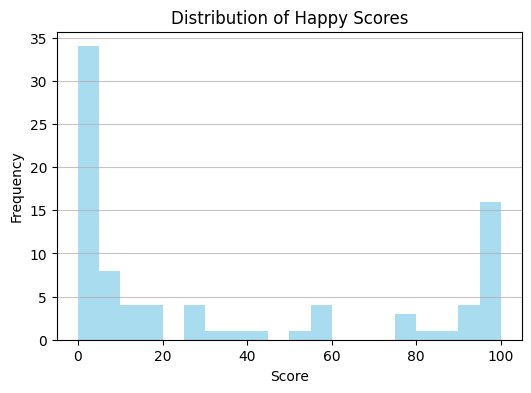

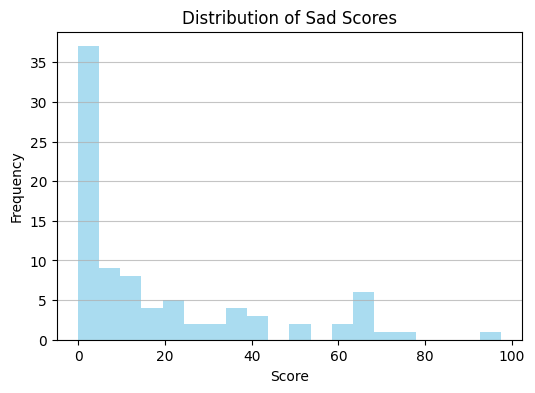

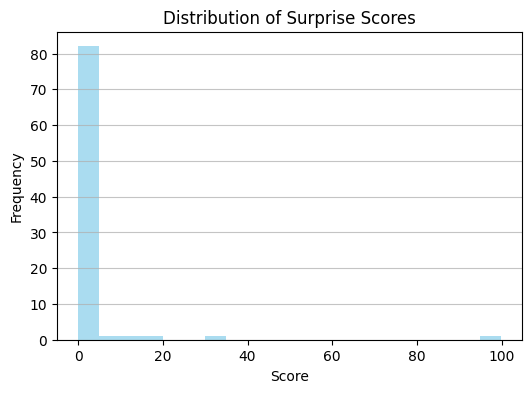

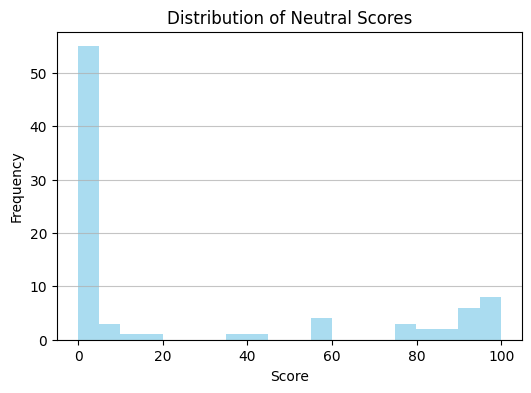

In [6]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

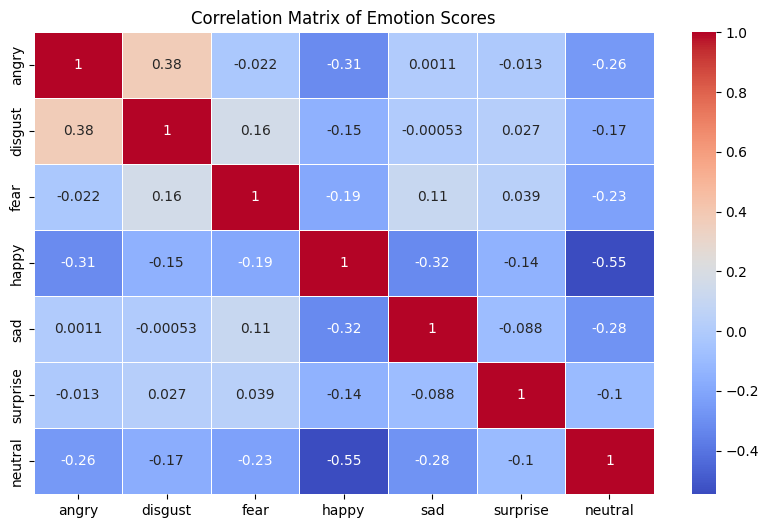

In [7]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

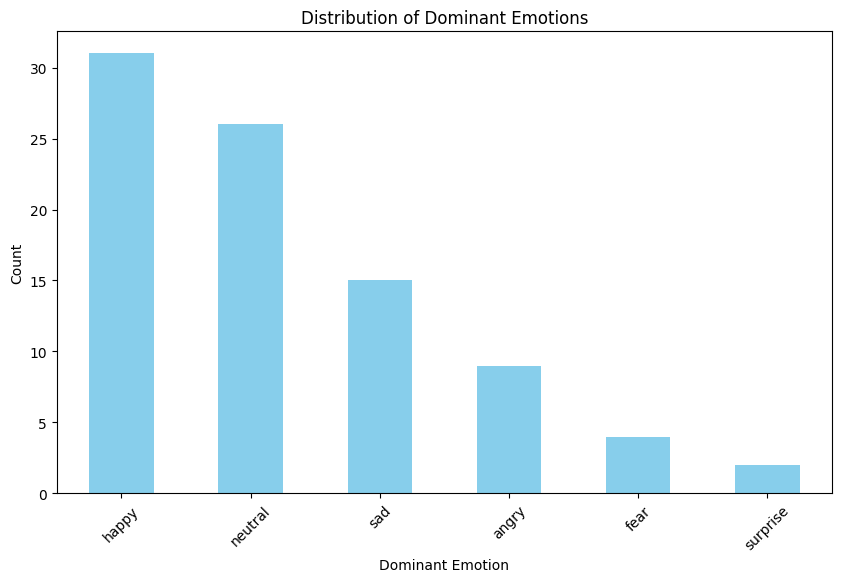

In [9]:
# Count the occurrences of each dominant emotion
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Plotting the distribution of dominant emotions
plt.figure(figsize=(10, 6))
dominant_emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.title('Distribution of Dominant Emotions')
plt.xticks(rotation=45)
plt.show()

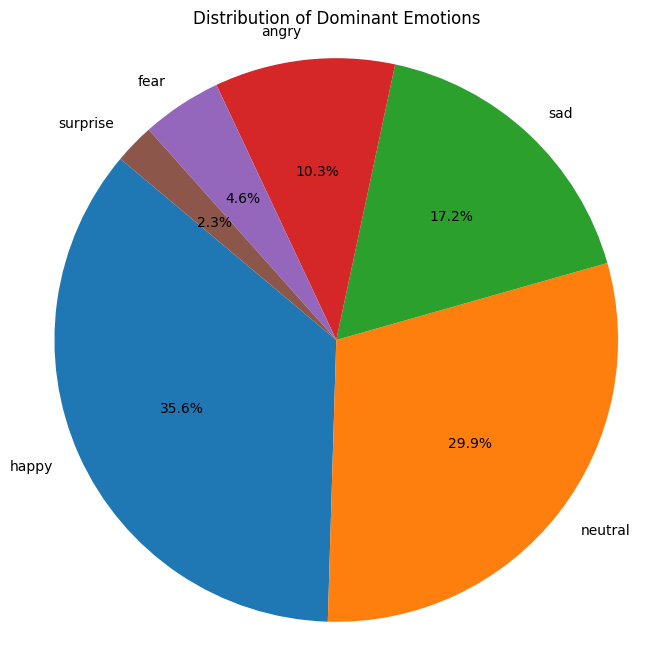

In [10]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [11]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,baa26895-85b2-465b-a972-649b41d9870e,1,0,1,42.3816
1,baa26895-85b2-465b-a972-649b41d9870e,2,0,0,28.1727
2,baa26895-85b2-465b-a972-649b41d9870e,3,1,0,-10.0732
3,baa26895-85b2-465b-a972-649b41d9870e,4,1,0,-10.6335
4,baa26895-85b2-465b-a972-649b41d9870e,5,1,0,18.6988


In [12]:
gaze_df.shape

(87, 5)

In [13]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  87.000000  87.000000   87.000000
mean    0.609195   0.045977   21.768546
std     0.490759   0.210649   15.619435
min     0.000000   0.000000  -15.240500
25%     0.000000   0.000000   11.852200
50%     1.000000   0.000000   20.370000
75%     1.000000   0.000000   29.883100
max     1.000000   1.000000   67.671000


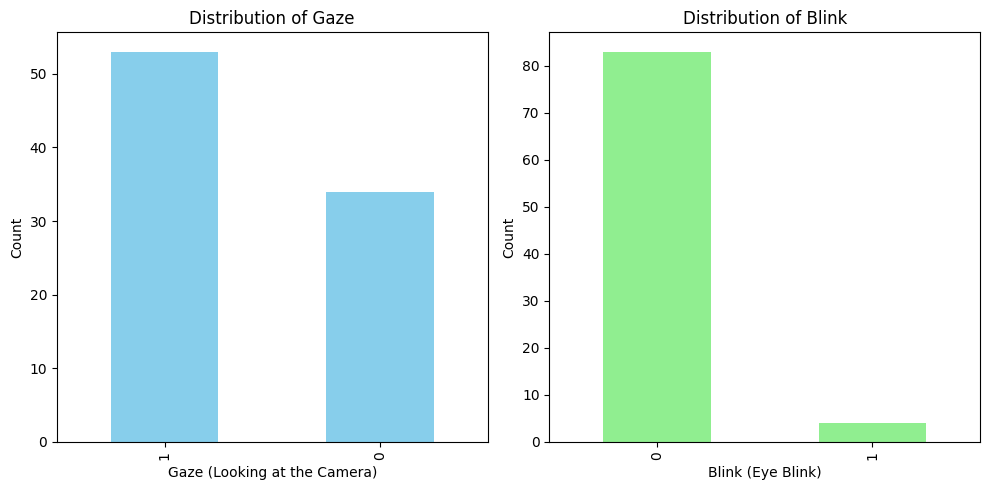

In [14]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

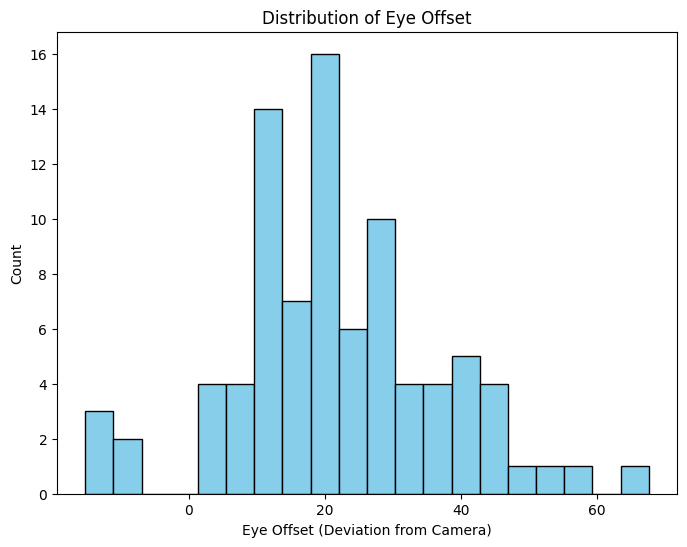

In [15]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [16]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,baa26895-85b2-465b-a972-649b41d9870e,0,3d7cd21a-3170-4352-b499-24ea04eaf48c,1.0,2023-09-17 07:44:49,0.0
1,baa26895-85b2-465b-a972-649b41d9870e,1,3d7cd21a-3170-4352-b499-24ea04eaf48c,2.0,2023-09-17 07:44:49,0.0
2,baa26895-85b2-465b-a972-649b41d9870e,2,3d7cd21a-3170-4352-b499-24ea04eaf48c,3.0,2023-09-17 07:44:49,0.0
3,baa26895-85b2-465b-a972-649b41d9870e,3,3d7cd21a-3170-4352-b499-24ea04eaf48c,4.0,2023-09-17 07:44:49,0.0
4,baa26895-85b2-465b-a972-649b41d9870e,4,3d7cd21a-3170-4352-b499-24ea04eaf48c,5.0,2023-09-17 07:44:49,0.0


In [17]:
metadata_df.shape

(87, 6)

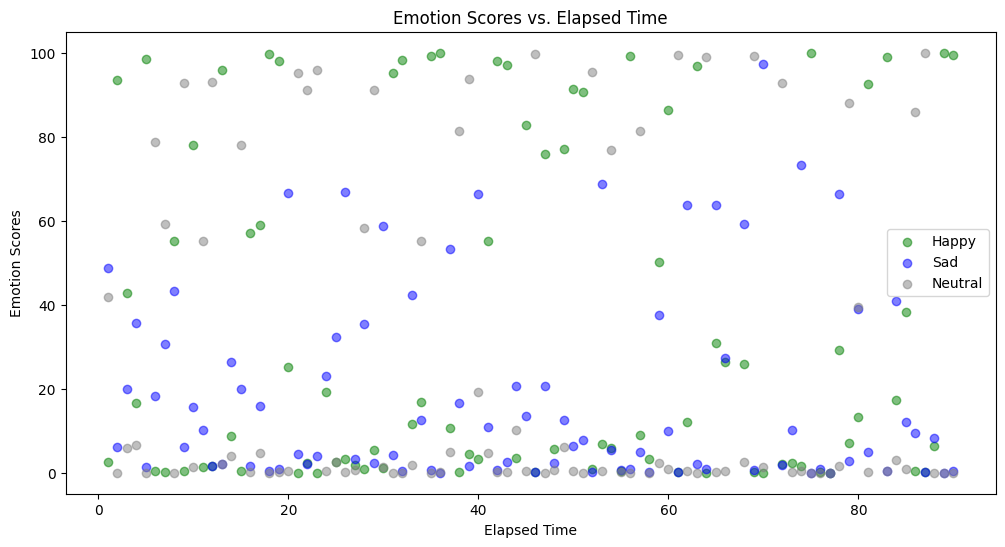

In [18]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [19]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

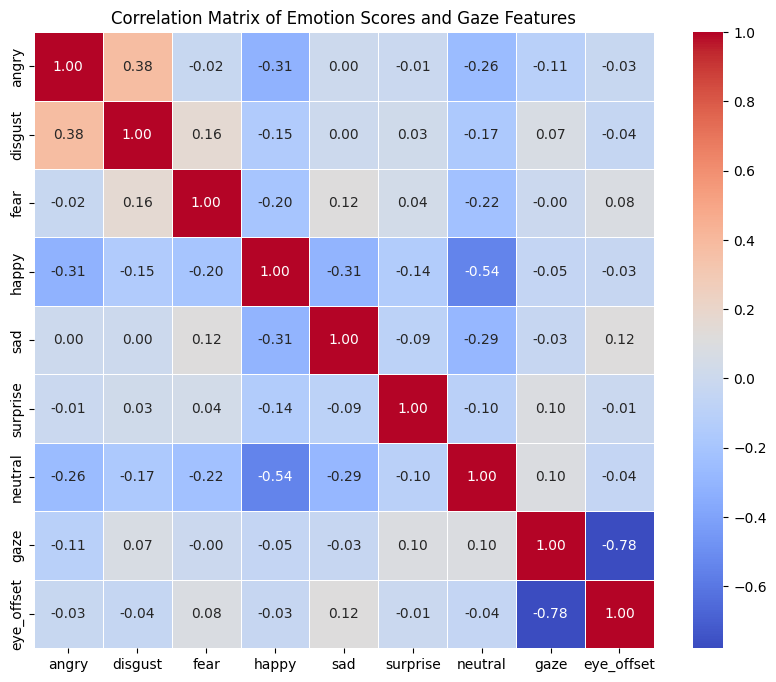

In [20]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'gaze', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [21]:
transcript_scores_df = pd.read_csv("2.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,4.32,"Hello, I am Beside You. I am Cameron Barajas ...","[50364, 2425, 11, 286, 669, 8190, 482, 509, 13...",0.0,-0.268956,1.666667,0.007107,0.909206,0.015431,0.075362,0.976302,0.020649,0.849303,0.998064,4.166667
1,1,0,4.32,10.00,today. I recently completed my BBA in 2022. I...,"[50580, 965, 13, 286, 3938, 7365, 452, 363, 92...",0.0,-0.268956,1.666667,0.007107,0.660675,0.052640,0.286685,0.968629,0.741091,0.649625,0.701379,2.992958
2,2,0,10.00,14.52,team and be a good team player according to t...,"[50864, 1469, 293, 312, 257, 665, 1469, 4256, ...",0.0,-0.268956,1.666667,0.007107,0.752118,0.103343,0.144539,0.381387,0.147522,0.181114,0.944817,3.539823
3,3,0,14.52,20.06,who aims for perfection in the task and I alw...,"[51090, 567, 24683, 337, 19708, 294, 264, 5633...",0.0,-0.268956,1.666667,0.007107,0.853778,0.070205,0.076017,0.953803,0.040392,0.480149,0.678803,3.429603
4,4,0,20.06,25.48,"In summer 2022, I interned in a boutique inve...","[51367, 682, 4266, 20229, 11, 286, 2154, 292, ...",0.0,-0.268956,1.666667,0.007107,0.599971,0.133195,0.266834,0.809297,0.800700,0.692573,0.446205,3.136531


In [22]:
transcript_scores_df.shape

(19, 18)

In [23]:
transcript_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19 non-null     int64  
 1   seek               19 non-null     int64  
 2   start              19 non-null     float64
 3   end                19 non-null     float64
 4   text               19 non-null     object 
 5   tokens             19 non-null     object 
 6   temperature        19 non-null     float64
 7   avg_logprob        19 non-null     float64
 8   compression_ratio  19 non-null     float64
 9   no_speech_prob     19 non-null     float64
 10  positive           19 non-null     float64
 11  negative           19 non-null     float64
 12  neutral            19 non-null     float64
 13  confident          19 non-null     float64
 14  hesitant           19 non-null     float64
 15  concise            19 non-null     float64
 16  enthusiastic       19 non-nu

In [24]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  19.000000  19.000000  19.000000  19.000000  19.000000  19.000000   
mean    0.722006   0.107541   0.170453   0.684879   0.436158   0.484221   
std     0.160438   0.083733   0.101724   0.239694   0.325049   0.246994   
min     0.445882   0.004820   0.011082   0.252384   0.002186   0.091963   
25%     0.617760   0.050085   0.089083   0.453661   0.079168   0.264890   
50%     0.705166   0.103343   0.165050   0.772993   0.523318   0.506651   
75%     0.852049   0.139718   0.238241   0.821340   0.707268   0.671099   
max     0.983976   0.309697   0.414358   0.993897   0.885920   0.892335   

       enthusiastic  speech_speed  
count     19.000000     19.000000  
mean       0.516685      3.269092  
std        0.307049      0.440166  
min        0.107444      2.483444  
25%        0.282396      3.011630  
50%        0.407736      3.244275  
75%        0.787675      3.484713  
max        0.998064      4.166667  


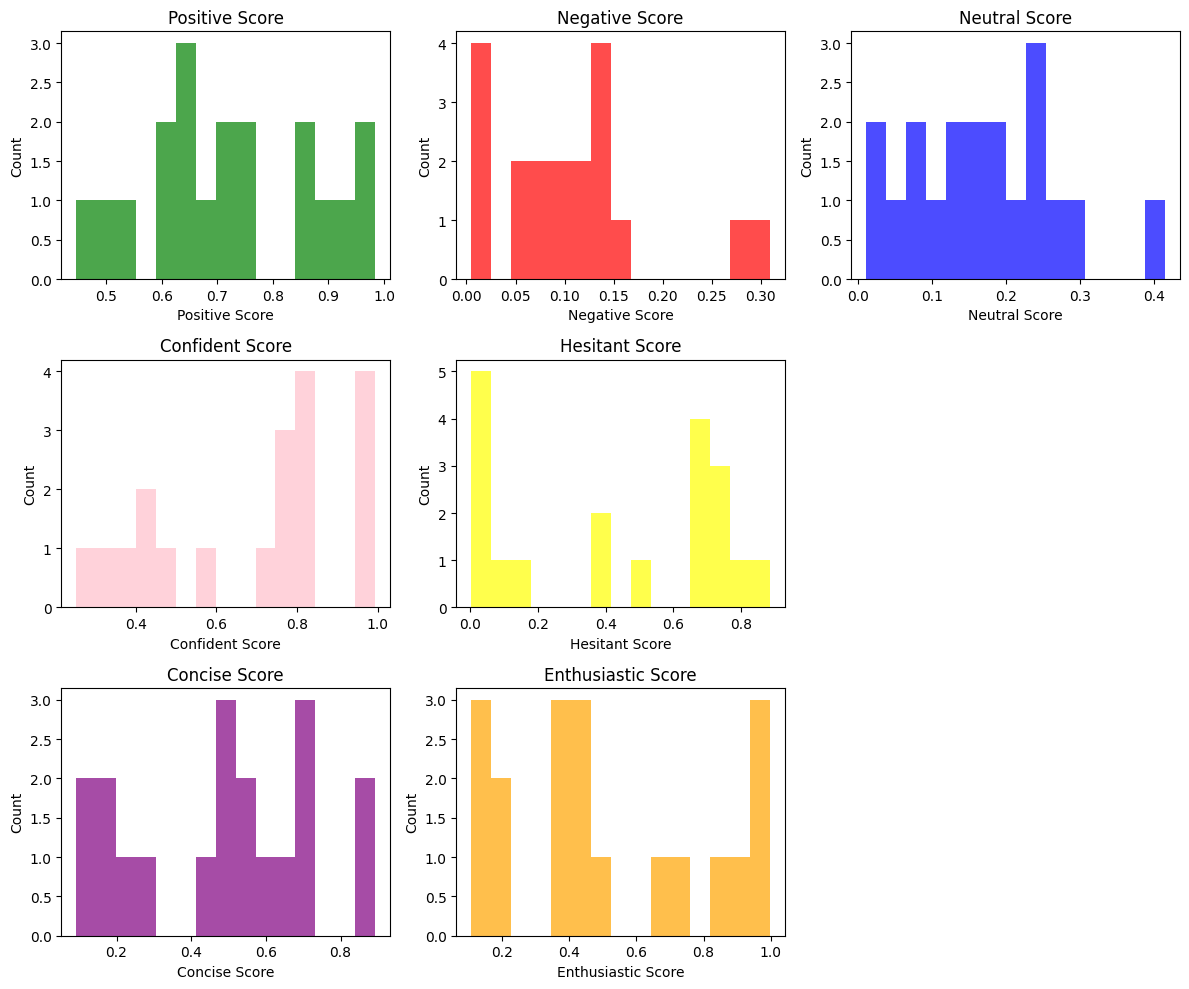

In [25]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

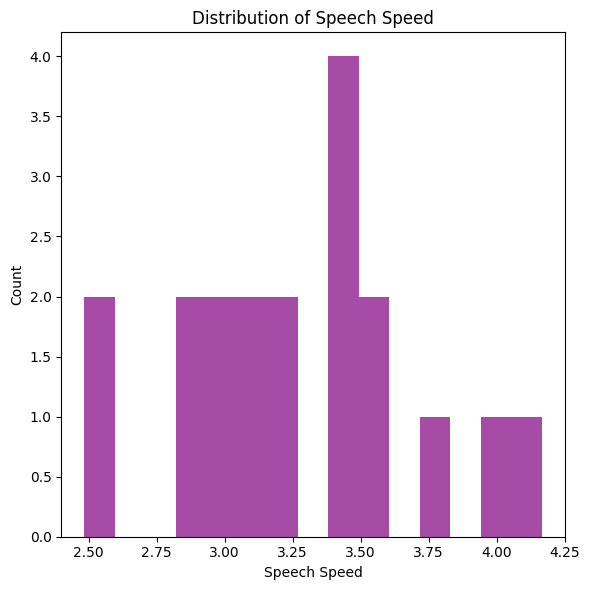

In [27]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

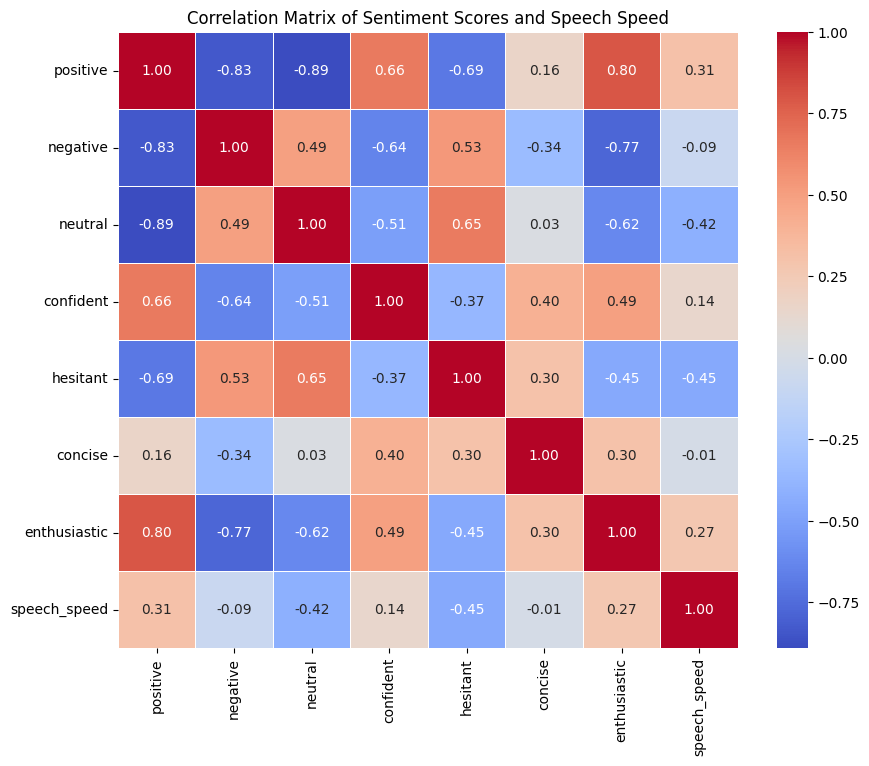

In [28]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

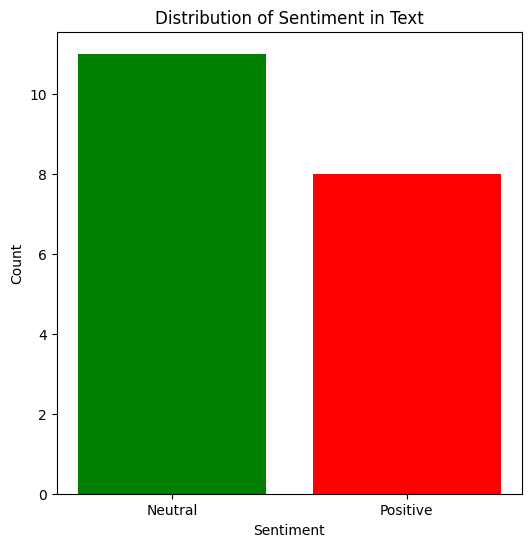

In [29]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [30]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])

                                                 text dominant_quality
0    Hello, I am Beside You. I am Cameron Barajas ...     enthusiastic
1    today. I recently completed my BBA in 2022. I...        confident
2    team and be a good team player according to t...     enthusiastic
3    who aims for perfection in the task and I alw...        confident
4    In summer 2022, I interned in a boutique inve...        confident
5    I worked closely with senior professionals. I...        confident
6    of a venture network at the ideation stage. T...         hesitant
7    funds at the seed level and CD sale levels. I...         hesitant
8    and what an investor should look for before i...         positive
9    process exciting. In addition to this, I inte...     enthusiastic
10   in this internship, I regularly discussed the...        confident
11   should be working with the founder. And I use...         hesitant
12   according to our discussions. And my area of ...        confident
13   S

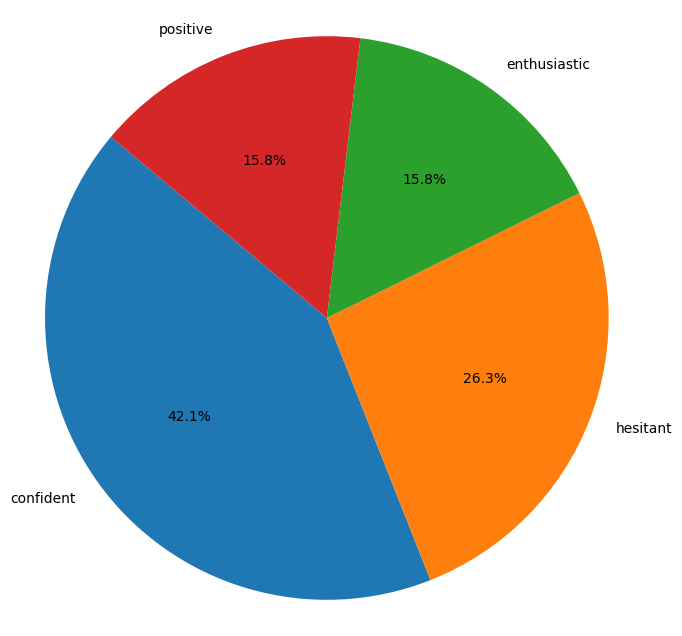

In [31]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [32]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'happy': 0.3563218390804598,
 'neutral': 0.2988505747126437,
 'sad': 0.1724137931034483,
 'angry': 0.10344827586206896,
 'fear': 0.04597701149425287,
 'surprise': 0.022988505747126436}

In [33]:
emotion_percentage_dict['disgust']=0

In [34]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [35]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 15.903067007761015


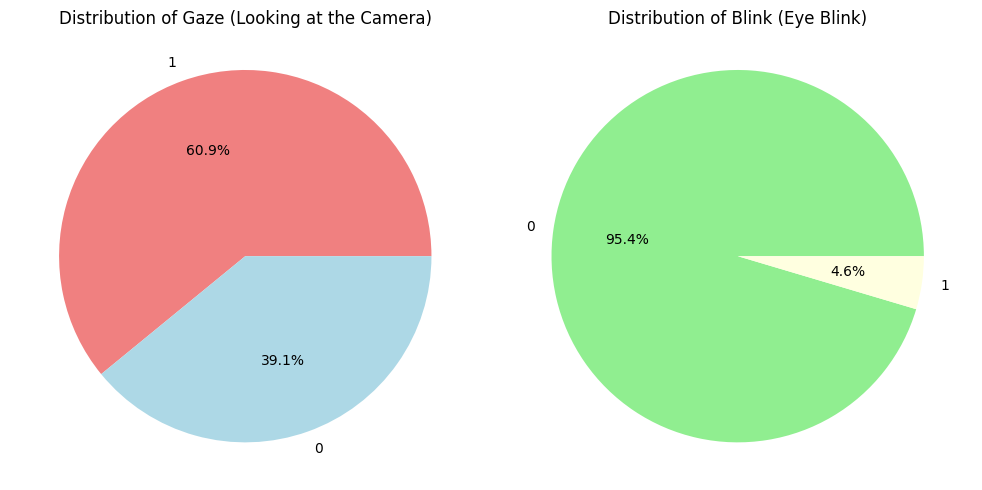

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [37]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [38]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [39]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.321045932311622

In [40]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'confident': 0.42105263157894735,
 'hesitant': 0.2631578947368421,
 'enthusiastic': 0.15789473684210525,
 'positive': 0.15789473684210525}

In [41]:
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict['negative']=0

In [45]:
sentiment_percentage_dict

{'confident': 0.42105263157894735,
 'hesitant': 0.2631578947368421,
 'enthusiastic': 0.15789473684210525,
 'positive': 0.15789473684210525,
 'concise': 0,
 'neutral': 0,
 'negative': 0}

In [46]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [56]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.36917464035805675

In [51]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [52]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.3886399759501044


In [57]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

21.216967358780483